In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [31]:
import os
from pathlib import Path
import pandas as pd
# 当前脚本文件路径
current_file_path = Path.cwd()
# 上一级文件夹路径
parent_folder_path = current_file_path.parent
#学校集群
Data_PATH = parent_folder_path / "ML_datasets"
print(Data_PATH)
def load_data(csv_name):
    csv_path = os.path.join(Data_PATH, csv_name)
    return pd.read_csv(csv_path)

/public/home/zss/ML_datasets


In [3]:
import tensorflow as tf
# from tensorflow import keras
tf.__version__

'2.18.0'

In [4]:
import keras
keras.__version__

'3.7.0'

In [214]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


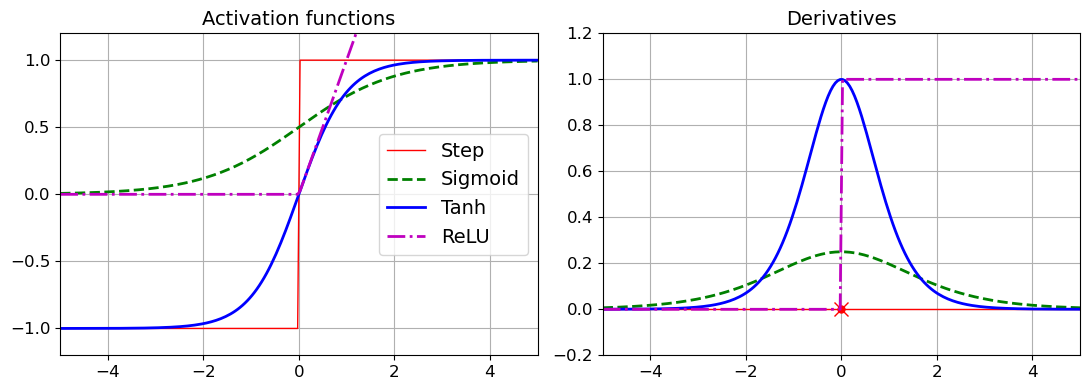

In [215]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

但是没有验证集，因此我们现在创建一个.
为了简单起见，我们将像素强度除以255.0（将它们转换为浮点数），将像素强度降低到0～1范围内

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

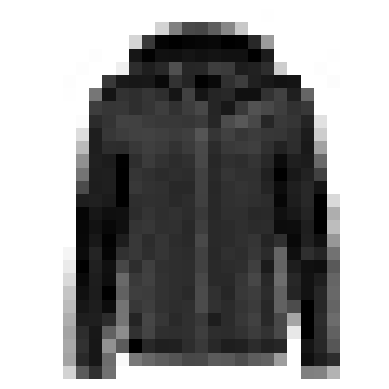

In [5]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
y_train[0]

np.uint8(4)

In [14]:
class_names[y_train[0]]

'Coat'

In [16]:
X_valid.shape

(5000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_plot


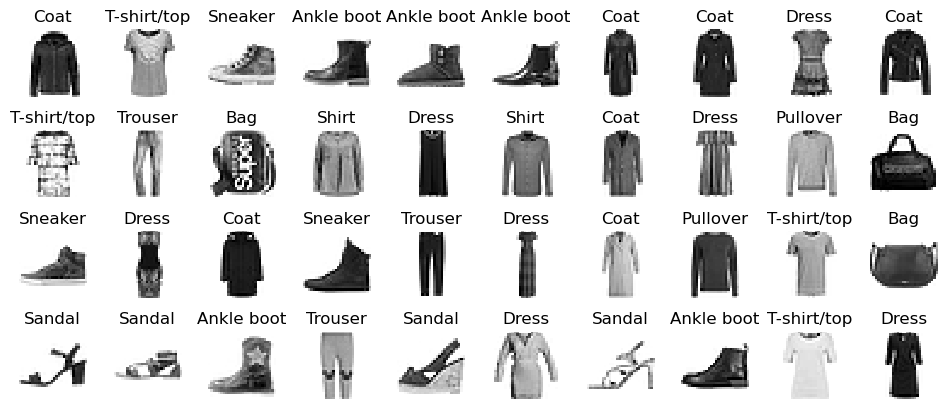

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

这是具有两个隐藏层的分类MLP

In [4]:
# 创建一个顺序模型
model = keras.models.Sequential()

# Flatten层：将输入的28x28的二维数组展平成一维，一维是28*28=784个数据的向量
# 这里输入数据的形状是 (28, 28)，即28x28像素的图像

model.add(keras.layers.Flatten(input_shape=[28, 28]))

# 全连接层：300个神经元，激活函数是ReLU
model.add(keras.layers.Dense(300, activation="relu"))

# 全连接层：100个神经元，激活函数是ReLU
model.add(keras.layers.Dense(100, activation="relu"))

# 输出层：10个神经元，激活函数是Softmax（用于多分类问题）
# 这里的10个神经元表示10个类别（例如，0-9的数字分类）
model.add(keras.layers.Dense(10, activation="softmax"))


/public/home/zss/softpath/Anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-01-07 14:53:39.716115: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

另外一种方式

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/public/home/zss/softpath/Anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-01-06 09:21:11.557268: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## 所有层的属性

In [8]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

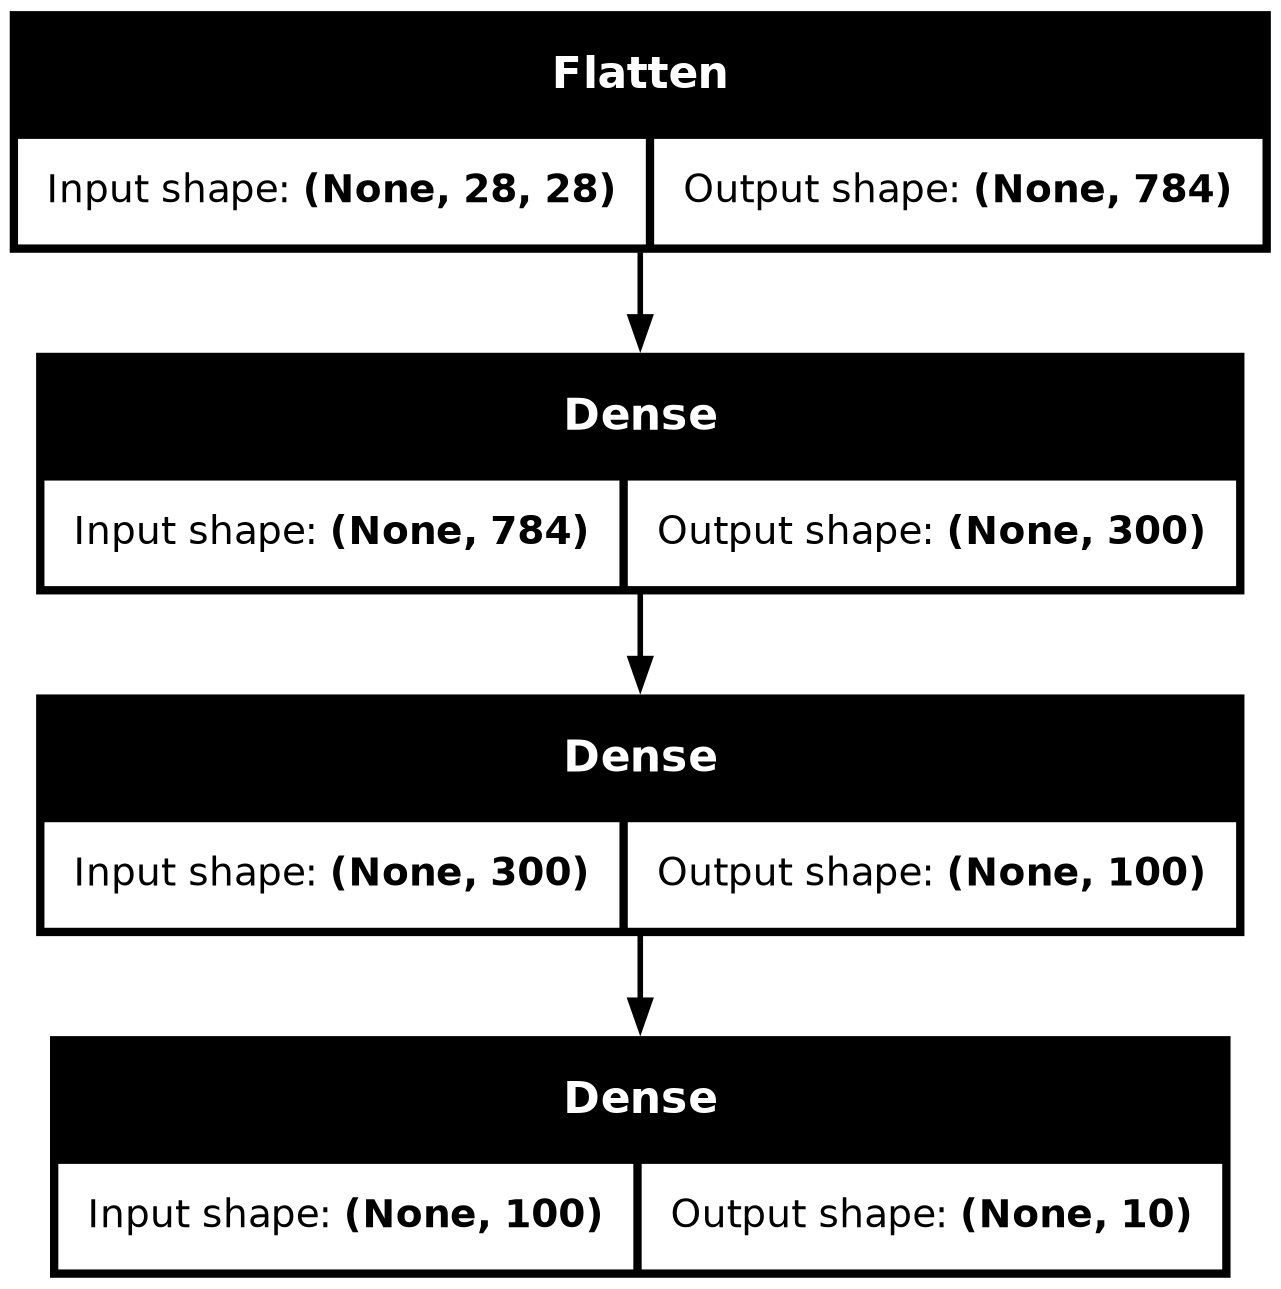

In [10]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

对选定层的相关操作

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [13]:
weights, biases = hidden1.get_weights()

In [14]:
weights

array([[-0.03236541, -0.0123848 , -0.04780854, ..., -0.06963037,
         0.06069151, -0.03065655],
       [-0.0728748 ,  0.04522757, -0.07347746, ..., -0.02465392,
         0.00169973, -0.04869236],
       [-0.04094014, -0.0619337 , -0.05245929, ...,  0.00393775,
         0.0225051 , -0.04304896],
       ...,
       [ 0.02947497,  0.05640163, -0.0562815 , ...,  0.0484229 ,
         0.0198579 , -0.06323167],
       [ 0.05082838, -0.06888249, -0.04226283, ..., -0.01336066,
        -0.00604981,  0.06881768],
       [-0.07091443,  0.04803129, -0.0037694 , ..., -0.06972181,
        -0.01713707, -0.07116535]], dtype=float32)

In [15]:
biases.shape

(300,)

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
'''
等同于
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
'''

In [17]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6715 - loss: 1.0211 - val_accuracy: 0.8284 - val_loss: 0.5220
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8260 - loss: 0.5095 - val_accuracy: 0.8542 - val_loss: 0.4380
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8409 - loss: 0.4521 - val_accuracy: 0.8578 - val_loss: 0.4161
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8530 - loss: 0.4250 - val_accuracy: 0.8548 - val_loss: 0.4207
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8565 - loss: 0.4034 - val_accuracy: 0.8668 - val_loss: 0.3859
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8638 - loss: 0.3824 - val_accuracy: 0.8638 - val_loss: 0.3853
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8667 - loss: 0.3750 - val_accuracy: 0.8644 - val_loss: 0.3854
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8713 - loss: 0

In [18]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [19]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [20]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Saving figure keras_learning_curves_plot


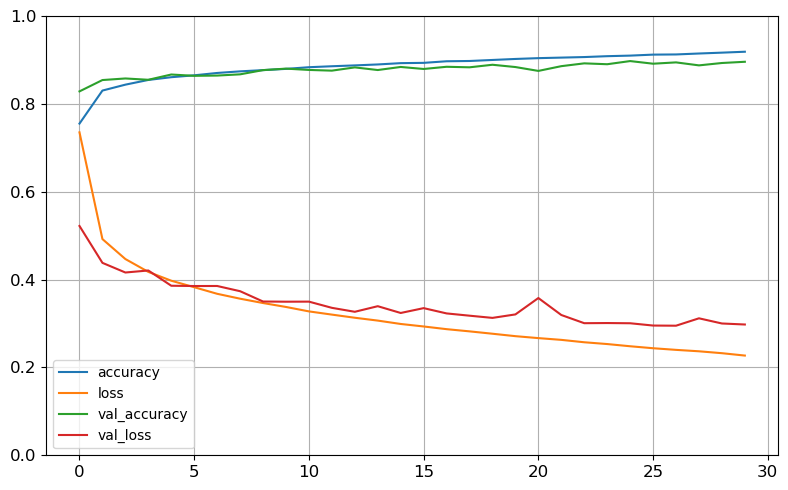

In [21]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

# 评估测试集

In [22]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8770 - loss: 0.3414


[0.3341544568538666, 0.8783000111579895]

# 使用模型进行预测

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([9, 2, 1])

In [25]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [26]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


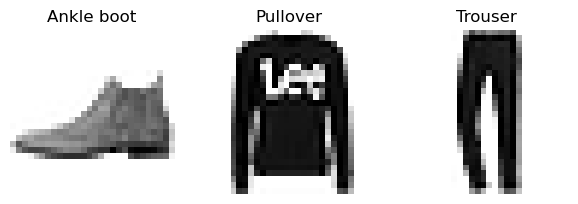

In [27]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# 10.2.3 使用顺序API构建回归MLP

In [54]:
import os
from pathlib import Path
import pandas as pd
# 当前脚本文件路径
current_file_path = Path.cwd()
# 上一级文件夹路径
parent_folder_path = current_file_path.parent
#学校集群
Data_PATH = parent_folder_path / "ML_datasets"
print(Data_PATH)
def load_data(csv_name):
    csv_path = os.path.join(Data_PATH, csv_name)
    return pd.read_csv(csv_path)

/public/home/zss/ML_datasets


In [110]:
column_names = [
    'longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms',
    'population', 'households', 'medianIncome', 'medianHouseValue'
]

data = pd.read_csv(os.path.join(Data_PATH, "cal_housing.data"), header=None, names=column_names)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   totalRooms        20640 non-null  float64
 4   totalBedrooms     20640 non-null  float64
 5   population        20640 non-null  float64
 6   households        20640 non-null  float64
 7   medianIncome      20640 non-null  float64
 8   medianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [149]:
housing_data = data.drop("medianHouseValue",axis=1)
housing_target = data["medianHouseValue"]
housing_target = housing_target/100000
# housing_data = housing_data.to_numpy()
# housing_target = housing_target.to_numpy()

In [164]:
housing_target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: medianHouseValue, dtype: float64

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing_data, housing_target,test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2,random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [173]:
# 查看数据集的形状
print("Training shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_valid.shape, y_valid.shape)
print("Test shape:", X_test.shape, y_test.shape)

Training shape: (13209, 8) (13209,)
Validation shape: (3303, 8) (3303,)
Test shape: (4128, 8) (4128,)


In [177]:
from tensorflow import keras
from sklearn.impute import SimpleImputer
from keras.layers import Input, BatchNormalization
# 创建模型
model = keras.models.Sequential([
    Input(shape=X_train.shape[1:]),  # 使用 Input 层定义输入形状
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)  # 输出层，用于回归任务
])

# 编译模型
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=1e-3))



In [178]:
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [179]:
# 训练模型
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# 评估模型
mse_test = model.evaluate(X_test, y_test)
print(f"Test MSE: {mse_test}")

# 预测
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(f"Predictions: {y_pred}")

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.5035 - val_loss: 0.6904
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5794 - val_loss: 0.4998
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4499 - val_loss: 0.4505
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4115 - val_loss: 0.4288
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3933 - val_loss: 0.4164
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3829 - val_loss: 0.4092
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3768 - val_loss: 0.4040
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3721 - val_loss: 0.3996
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3680 - val_loss: 0.3957
Epoch 10/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3640 - val_loss: 0.3917
Epoch 11/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3605 - val_loss: 0.3880
Epoch 12/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

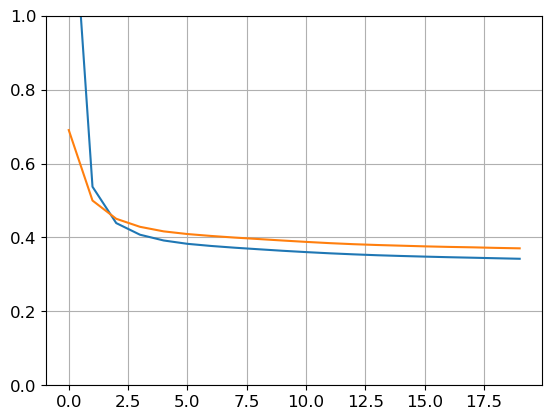

In [180]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 10.2.4 使用函数式API构建复杂模型

In [181]:
np.random.seed(42)
tf.random.set_seed(42)

In [182]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])


In [183]:
model.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_27      │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_58 (Dense)    │ (None, 30)        │        270 │ input_layer_27[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_59 (Dense)    │ (None, 30)        │        930 │ dense_58[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 38)        │          0 │ input_layer_27[0… │
│ (Concatenate)       │                   │            │ dense_59[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_60 (Dense)    │ (None, 1)         │         39 │ concatenate_3[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [184]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mes_test = model.evaluate(X_test, y_test)
print(f"Test MSE: {mse_test}")
y_pred = model.predict(X_test)
print(f"Predictions: {y_pred}")

Epoch 1/20


/public/home/zss/softpath/Anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_98']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


401/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4484

/public/home/zss/softpath/Anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_98']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.4174 - val_loss: 0.7610
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6702 - val_loss: 0.6272
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5706 - val_loss: 0.5724
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5277 - val_loss: 0.5414
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5024 - val_loss: 0.5206
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4851 - val_loss: 0.5060
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4727 - val_loss: 0.4953
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4631 - val_loss: 0.4866
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4553 - val_loss: 0.4794
Epoch 10/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4485 - val_loss: 0.4731
Epoch 11/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4424 - val_loss: 0.4675
Epoch 12/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.

/public/home/zss/softpath/Anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_98']
Received: inputs=Tensor(shape=(32, 8))
  warnings.warn(msg)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predictions: [[0.5512346]
 [1.7127442]
 [3.8742998]
 ...
 [4.5851254]
 [0.9840317]
 [1.7097213]]


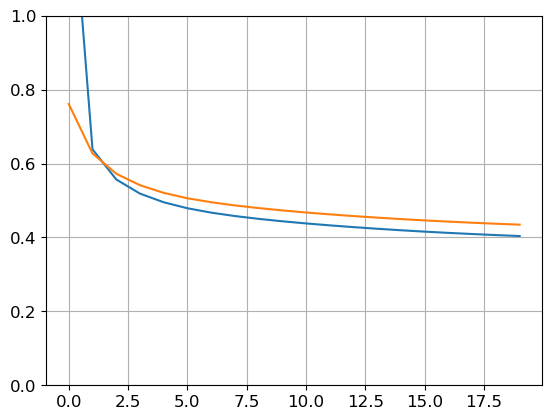

In [186]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 宽深神经网络

In [187]:
np.random.seed(42)
tf.random.set_seed(42)

In [189]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1,name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=output)

In [190]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.4328 - val_loss: 0.8795
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7885 - val_loss: 0.6862
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6412 - val_loss: 0.6115
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5791 - val_loss: 0.5702
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5424 - val_loss: 0.5429
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5168 - val_loss: 0.5230
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4969 - val_loss: 0.5074
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4811 - val_loss: 0.4952
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4691 - val_loss: 0.4858
Epoch 10/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4594 - val_loss: 0.4783
Epoch 11/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4515 - val_loss: 0.4720
Epoch 12/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [191]:
print(f"Test MSE: {mse_test}")
print(f"Predictions: {y_pred}")

Test MSE: 0.4289499819278717
Predictions: [[0.71878755]
 [1.704468  ]
 [4.147275  ]]


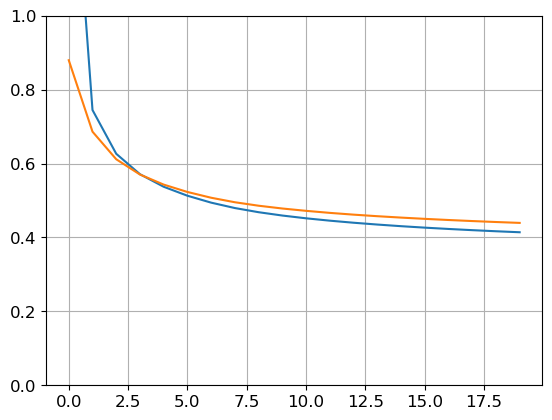

In [192]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Adding an auxiliary output for regularization:
增加辅助输出

In [193]:
np.random.seed(42)
tf.random.set_seed(42)

In [194]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [195]:
model.summary()

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_65 (Dense)    │ (None, 30)        │        210 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_66 (Dense)    │ (None, 30)        │        930 │ dense_65[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 35)        │          0 │ wide_input[0][0], │
│ (Concatenate)       │                   │            │ dense_66[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 1)         │         36 │ concatenate_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aux_output (Dense)  │ (None, 1)         │         31 │ dense_66[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,207 (4.71 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 0 (0.00 B)

In [196]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - aux_output_loss: 6.2408 - loss: 3.5172 - main_output_loss: 3.2146 - val_aux_output_loss: 4.6188 - val_loss: 1.5264 - val_main_output_loss: 1.1809
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - aux_output_loss: 3.8785 - loss: 1.3051 - main_output_loss: 1.0191 - val_aux_output_loss: 2.4772 - val_loss: 0.9929 - val_main_output_loss: 0.8278
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - aux_output_loss: 2.1065 - loss: 0.9012 - main_output_loss: 0.7673 - val_aux_output_loss: 1.4364 - val_loss: 0.8046 - val_main_output_loss: 0.7346
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - aux_output_loss: 1.2694 - loss: 0.7442 - main_output_loss: 0.6858 - val_aux_output_loss: 0.9951 - val_loss: 0.7093 - val_main_output_loss: 0.6777
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - aux_output_loss: 0.9161 - loss: 0.6635 - main_output_loss: 0.6354 - val_aux_output_loss: 0.8182 - val_loss: 0.6553 - val_main_output_loss: 0.6376


In [197]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - aux_output_loss: 0.5844 - loss: 0.4785 - main_output_loss: 0.4667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


In [198]:
print(f"total loss: {total_loss},main loss: {main_loss},aux loss: {aux_loss}")

total loss: 0.4784443974494934,main loss: 0.4668087661266327,aux loss: 0.5831663012504578


# 使用子类API构建动态模型

In [205]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [206]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10


ValueError: `loss_weights` must match the number of losses, got 1 losses and 2 weights.

# TensorBoard

In [210]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(Data_PATH / r"TensorBoard", run_id)

run_logdir = get_run_logdir()
run_logdir

'/public/home/zss/ML_datasets/TensorBoard/run_2025_01_06-18_35_08'

In [211]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [212]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

/public/home/zss/softpath/Anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [213]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.8651 - val_loss: 0.8582
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7431 - val_loss: 0.6911
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6217 - val_loss: 0.6280
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5718 - val_loss: 0.5856
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5389 - val_loss: 0.5558
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5150 - val_loss: 0.5339
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4967 - val_loss: 0.5171
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4820 - val_loss: 0.5038
Epoch 9/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4697 - val_loss: 0.4930
Epoch 10/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4592 - val_loss: 0.4840
Epoch 11/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4501 - val_loss: 0.4762
Epoch 12/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

# 练习题
在MNIST数据集上训练一个深度MLP，你可以使用keras.data sets.mnist.load_data（）加载它，看是否可以获得98％以上的精度

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [7]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape,X_test.shape, y_test.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,), (10000, 28, 28), (10000,))

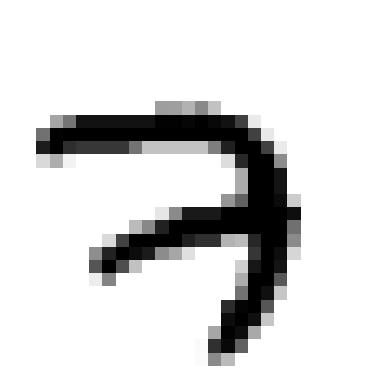

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [21]:
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        # 获取当前学习率
        current_lr = float(self.model.optimizer.learning_rate.numpy())  # 获取当前学习率值
        self.rates.append(current_lr)
        self.losses.append(logs["loss"])

        # 更新学习率
        new_lr = current_lr * self.factor
        self.model.optimizer.learning_rate.assign(new_lr)  # 设置新的学习率


In [22]:
# keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
import keras
model = keras.models.Sequential([
    # keras.layers.Input(shape=[28,28]),
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10,activation="softmax")  # 输出层
])


In [24]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["accuracy"])

expon_lr = ExponentialLearningRate(factor=1.005)

In [25]:
history = model.fit(X_train, y_train, epochs=1,validation_data=(X_valid, y_valid),callbacks=[expon_lr])

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.4984 - loss: nan - val_accuracy: 0.0958 - val_loss: nan


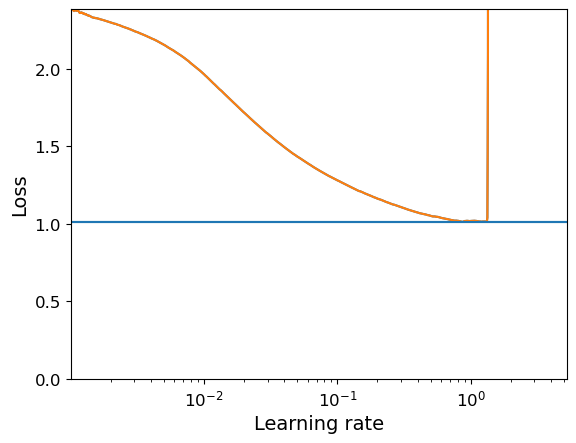

In [27]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()

In [28]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [32]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(Data_PATH, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'/public/home/zss/ML_datasets/my_mnist_logs/run_001'

In [35]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.keras", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8691 - loss: 0.4107 - val_accuracy: 0.9648 - val_loss: 0.1148
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9683 - loss: 0.1034 - val_accuracy: 0.9730 - val_loss: 0.0913
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9816 - loss: 0.0623 - val_accuracy: 0.9746 - val_loss: 0.0893
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9867 - loss: 0.0431 - val_accuracy: 0.9778 - val_loss: 0.0839
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9899 - loss: 0.0323 - val_accuracy: 0.9784 - val_loss: 0.0846
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9908 - loss: 0.0287 - val_accuracy: 0.9796 - val_loss: 0.0891
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9926 - loss: 0.0223 - val_accuracy: 0.9796 - val_loss: 0.0875
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9931 -

In [36]:
model = keras.models.load_model("my_mnist_model.keras") # rollback to best model
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9781 - loss: 0.0990


[0.07959786057472229, 0.9817000031471252]